In [1]:
suppressPackageStartupMessages({
    library(Matrix)
    library(ggplot2)
    library(cygnus)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(ggthemes)
    library(viridis)
    library(patchwork)
    library(glue)
    library(sf)
    library(ComplexHeatmap)
    library(RSpectra)
    library(mclust)
    library(Seurat)
    library(DESeq2)
    })

fig.size <- function(w,h) {
    options(repr.plot.height = h, repr.plot.width = w)
}

In [2]:
aggs1 = readRDS("outputs/aggs1.rds")
counts_data = aggs1$counts
metadata = aggs1$meta_data
dmt1 = readRDS('outputs/dmt1.rds')
genes = read.table('data/VizgenLungHacohen/cells/genes.txt')

In [3]:

row.names(counts_data) = genes$V1


In [4]:
# Add spatial_cluster into aggs1 metadata df
metadata = merge(metadata, dmt1$pts[,c('agg_id', 'spatial_cluster')], by.x='id', by.y='agg_id')
head(metadata)

id,X,Y,npts,shape,area,perimeter,spatial_cluster
<int>,<dbl>,<dbl>,<dbl>,<GEOMETRY>,<dbl>,<dbl>,<fct>
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13
1,7065.793,-14.34093,49,POLYGON ((7036.463 14.26976...,3419.191,309.4606,13


In [5]:
# Input unnormalized counts into DESeq as required by the package instructiondim(counts_data)
meta = dmt1$pts[,c('agg_id', 'spatial_cluster')]
meta = distinct(meta)
meta = meta[order(agg_id)]
head(meta)
# Help solve the error with DESeq2
# Every gene contains at least one zero, cannot compute log geometric means

counts_data = counts_data + 1

agg_id,spatial_cluster
<int>,<fct>
1,13
2,1
3,0
4,13
5,0
6,0


In [ ]:
dds <- DESeqDataSetFromMatrix(countData=counts_data, colData=meta, design=~spatial_cluster)


In [ ]:
res = c()
clusters = as.character(seq(1:13))
for (i in 1:length(clusters)){
  print(i, clusters[i])
  deseq2results <- results(dds, contrast=c('spatial_cluster', clusters[i], '0'))
  deseq2results$cluster <- i
  top_ten = deseq2results[order(deseq2results$log2FoldChange, decreasing=TRUE),][1:10,]
  print(top_ten)
  res <- rbind(res, top_ten)
}


In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [ ]:

library(dplyr)
library(tidyr)
library(reshape2)
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
df$gene_names <- row.names(df)
df_wide <- dcast(df, cluster ~ gene_names, value.var = "log2FoldChange")
rownames(df_wide) <- df_wide$cluster
df_wide$spatial_cluster <- NULL
# Convert df_wide to a matrix for the heatmap function
mat <- data.matrix(df_wide)
mat



In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [ ]:

library(dplyr)
library(tidyr)
library(reshape2)
library(lattice)
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
new_df = c()
for (cl in 1:13){
   new_df = rbind(new_df, df[df$cluster==cl,'log2FoldChange'])
}
row.names(new_df) = 1:13
colnames(new_df) = 1:10

mat <- as.matrix(new_df)

# Make a basic heatmap
heatmap(mat,#%%
suppressPackageStartupMessages({
    library(Matrix)
    library(ggplot2)
    library(cygnus)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(ggthemes)
    library(viridis)
    library(patchwork)
    library(glue)
    library(sf)
    library(ComplexHeatmap)
    library(RSpectra)
    library(mclust)
    library(Seurat)
    library(DESeq2)
    })

fig.size <- function(w,h) {
    options(repr.plot.height = h, repr.plot.width = w)
}

In [ ]:
aggs1 = readRDS("outputs/aggs1.rds")
counts_data = aggs1$counts
metadata = aggs1$meta_data
dmt1 = readRDS('outputs/dmt1.rds')
genes = read.table('data/VizgenLungHacohen/cells/genes.txt')

In [ ]:

row.names(counts_data) = genes$V1


In [ ]:
# Add spatial_cluster into aggs1 metadata df
metadata = merge(metadata, dmt1$pts[,c('agg_id', 'spatial_cluster')], by.x='id', by.y='agg_id')
head(metadata)

In [ ]:
# Input unnormalized counts into DESeq as required by the package instructiondim(counts_data)
meta = dmt1$pts[,c('agg_id', 'spatial_cluster')]
meta = distinct(meta)
meta = meta[order(agg_id)]
head(meta)
# Help solve the error with DESeq2
# Every gene contains at least one zero, cannot compute log geometric means

counts_data = counts_data + 1

In [ ]:
dds <- DESeqDataSetFromMatrix(countData=counts_data, colData=meta, design=~spatial_cluster)


In [ ]:
res = c()
clusters = as.character(seq(1:13))
for (i in 1:length(clusters)){
  print(i, clusters[i])
  deseq2results <- results(dds, contrast=c('spatial_cluster', clusters[i], '0'))
  deseq2results$cluster <- i
  top_ten = deseq2results[order(deseq2results$log2FoldChange, decreasing=TRUE),][1:10,]
  print(top_ten)
  res <- rbind(res, top_ten)
}


In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [ ]:

library(dplyr)
library(tidyr)
library(reshape2)
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
df$gene_names <- row.names(df)
df_wide <- dcast(df, cluster ~ gene_names, value.var = "log2FoldChange")
rownames(df_wide) <- df_wide$cluster
df_wide$spatial_cluster <- NULL
# Convert df_wide to a matrix for the heatmap function
mat <- data.matrix(df_wide)
mat



In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

Spatial_Clusters,Genes,log2FoldChange
<int>,<int>,<dbl>
1,1,1.0705171
2,1,3.7762177
3,1,1.2935958
4,1,3.2392838
5,1,2.2024267
6,1,2.2960237
7,1,2.4360970
8,1,0.7839084
9,1,1.2308857


ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Cannot add [34m<ggproto>[39m objects together.
[36mℹ[39m Did you forget to add this object to a [34m<ggplot>[39m object?


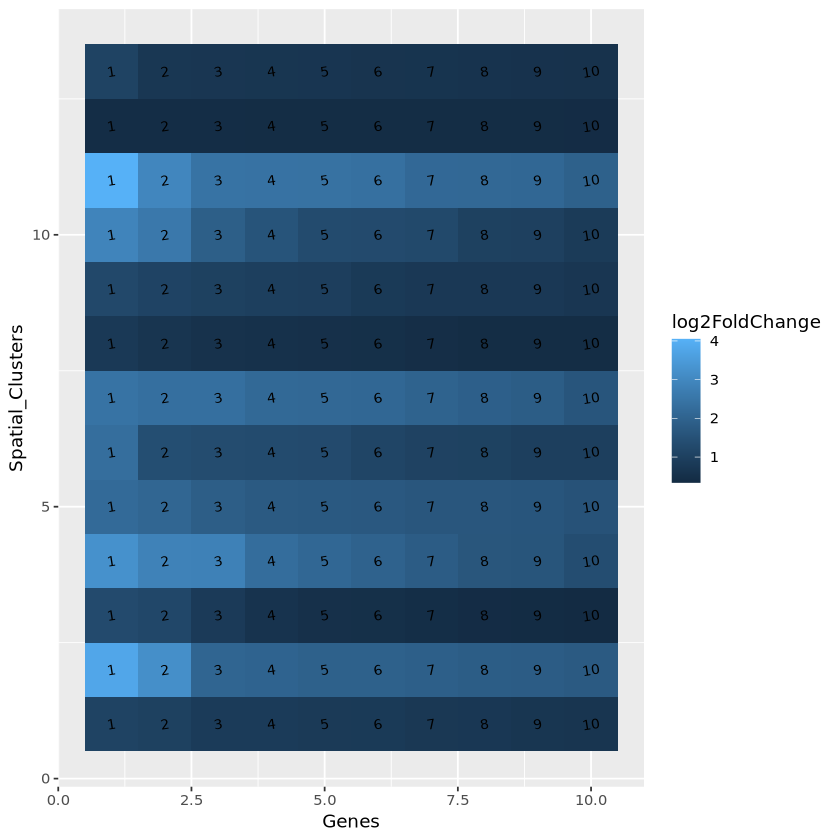

In [50]:

library(dplyr)
library(tidyr)
library(reshape2)
library(lattice)
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
new_df = c()
for (cl in 1:13){
   new_df = rbind(new_df, df[df$cluster==cl,'log2FoldChange'])
}
row.names(new_df) = 1:13
colnames(new_df) = 1:10

df_long <- melt(new_df, varnames=c("Spatial_Clusters", "Genes"),
                value.name = "log2FoldChange")
df_long

# Create heatmap using ggplot2
ggplot(df_long, aes(x=Genes, y=Spatial_Clusters, fill=log2FoldChange)) +
  geom_tile() +
  geom_text(aes(label=Genes), size=3, angle=9)
  scale_fill_gradient2(low='blue', high='red', mid='white',
                    midpoint = median(df_long$log2FoldChange, na.rm = TRUE),
                    limit = range(df_long$log2FoldChange, na.rm=TRUE)) +
  theme_minimal() +
  labs(title = "Top 10 genes across spatial cluster",
       x = "Genes",
        y = "Spatial_Clusters",
        fill = "Log2 Fold Change")




In [ ]:
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
new_df = c()
for (cl in 1:13){#%%
suppressPackageStartupMessages({
    library(Matrix)
    library(ggplot2)
    library(cygnus)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(ggthemes)
    library(viridis)
    library(patchwork)
    library(glue)
    library(sf)
    library(ComplexHeatmap)
    library(RSpectra)
    library(mclust)
    library(Seurat)
    library(DESeq2)
    })

fig.size <- function(w,h) {
    options(repr.plot.height = h, repr.plot.width = w)
}

In [ ]:
aggs1 = readRDS("outputs/aggs1.rds")
counts_data = aggs1$counts
metadata = aggs1$meta_data
dmt1 = readRDS('outputs/dmt1.rds')
genes = read.table('data/VizgenLungHacohen/cells/genes.txt')

In [ ]:

row.names(counts_data) = genes$V1


In [ ]:
# Add spatial_cluster into aggs1 metadata df
metadata = merge(metadata, dmt1$pts[,c('agg_id', 'spatial_cluster')], by.x='id', by.y='agg_id')
head(metadata)

In [ ]:
# Input unnormalized counts into DESeq as required by the package instructiondim(counts_data)
meta = dmt1$pts[,c('agg_id', 'spatial_cluster')]
meta = distinct(meta)
meta = meta[order(agg_id)]
head(meta)
# Help solve the error with DESeq2
# Every gene contains at least one zero, cannot compute log geometric means

counts_data = counts_data + 1

In [ ]:
dds <- DESeqDataSetFromMatrix(countData=counts_data, colData=meta, design=~spatial_cluster)


In [ ]:
res = c()
clusters = as.character(seq(1:13))
for (i in 1:length(clusters)){
  print(i, clusters[i])
  deseq2results <- results(dds, contrast=c('spatial_cluster', clusters[i], '0'))
  deseq2results$cluster <- i
  top_ten = deseq2results[order(deseq2results$log2FoldChange, decreasing=TRUE),][1:10,]
  print(top_ten)
  res <- rbind(res, top_ten)
}


In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [56]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
COL3A1,45.613310,1.0705171,0.02812056,38.06884,0.000000e+00,0.000000e+00,1
COL4A1,22.228515,1.0103055,0.02792485,36.17945,1.281664e-286,2.923414e-285,1
LYZ,15.156765,0.8504059,0.02600618,32.70014,1.554387e-234,2.189857e-233,1
C1QA,9.517584,0.8439728,0.02118093,39.84587,0.000000e+00,0.000000e+00,1
C1QC,10.619758,0.8090398,0.02152959,37.57803,0.000000e+00,0.000000e+00,1
SFRP2,5.186909,0.7971797,0.02968968,26.85040,8.344576e-159,7.837356e-158,1
C1QB,9.126496,0.7396598,0.02071272,35.71041,2.725026e-279,5.933125e-278,1
CD163,25.784825,0.7269569,0.02088633,34.80540,2.015151e-265,3.861029e-264,1
MRC1,12.627104,0.6707632,0.02017838,33.24167,2.693330e-242,4.161630e-241,1


In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [ ]:
#saveRDS(dds, 'outputs/p1DE.rds')
res <- read.csv('outputs/p1deseq_spatialcluster.csv', row.names=1)
res

In [ ]:

library(dplyr)
library(tidyr)
library(reshape2)
library(lattice)
df = as.data.frame(res[c('log2FoldChange', 'cluster')])
new_df = c()
for (cl in 1:13){
   new_df = rbind(new_df, df[df$cluster==cl,'log2FoldChange'])
}
row.names(new_df) = 1:13
colnames(new_df) = 1:10

df_long <- melt(new_df, varnames=c("Spatial_Clusters", "Genes"),
                value.name = "log2FoldChange")
df_long

# Create heatmap using ggplot2
ggplot(df_long, aes(x=Genes, y=Spatial_Clusters, fill=log2FoldChange)) +
  geom_tile() +
  geom_text(aes(label=Genes), size=3, angle=9)
  scale_fill_gradient2(low='blue', high='red', mid='white',
                    midpoint = median(df_long$log2FoldChange, na.rm = TRUE),
                    limit = range(df_long$log2FoldChange, na.rm=TRUE)) +
  theme_minimal() +
  labs(title = "Top 10 genes across spatial cluster",
       x = "Genes",
        y = "Spatial_Clusters",
        fill = "Log2 Fold Change")


